PCA

The purpose of this post is to provide a complete and simplified explanation of Principal Component Analysis (PCA). We'll cover how it works step by step, so everyone can understand it and make use of it, even those without a strong mathematical background.

PCA is a widely covered method on the web, and there are some great articles about it, but many spend too much time in the weeds on the topic, when most of us just want to know how it works in a simplified way. 

Principal component analysis can be broken down into five steps. I'll go through each step, providing logical explanations of what PCA is doing and simplifying mathematical concepts such as standardization, covariance, eigenvectors and eigenvalues without focusing on how to compute them.

HOW DO YOU DO A PCA?

1.Standardize the range of continuous initial variables

2.Compute the covariance matrix to identify correlations

3.Compute the eigenvectors and eigenvalues of the covariance matrix to identify the principal components

4.Create a feature vector to decide which principal components to keep

5.Recast the data along the principal components axes

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline
%matplotlib inline

Three-category wine dataset

In [19]:
features, target = load_wine(return_X_y=True)                   
features.shape, target.shape

((178, 13), (178,))

Divide the data into 7:3 as training set and test set respectively

In [20]:
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(features, target,test_size=0.30,random_state=RANDOM_STATE)

Do not use PCA

In [21]:
raw_clf = make_pipeline(StandardScaler(), LogisticRegression())
raw_clf.fit(X_train, y_train)
pred_test_raw = raw_clf.predict(X_test)

Use PCA without data preprocessing

In [22]:
unscaled_clf = make_pipeline(PCA(n_components=2), LogisticRegression())
unscaled_clf.fit(X_train, y_train)
pred_test = unscaled_clf.predict(X_test)

Use PCA and do data preprocessing at the same time

In [23]:
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

In [24]:
print(u'\nDo not use PCA:', '{:.2%}'.format(metrics.accuracy_score(y_test, pred_test_raw)))
print(u'\nUse PCA without data preprocessing:', '{:.2%}'.format(metrics.accuracy_score(y_test, pred_test)))
print(u'\nUse PCA and do data preprocessing at the same time :', '{:.2%}'.format(metrics.accuracy_score(y_test, pred_test_std)))


Do not use PCA: 98.15%

Use PCA without data preprocessing: 68.52%

Use PCA and do data preprocessing at the same time : 96.30%


Get PCA data

In [26]:
pca = unscaled_clf.named_steps['pca']
pca_std = std_clf.named_steps['pca']

In [27]:
print(u'\nUnpreprocessed first principal component:\n', pca.components_[0])
print(u'\npreprocessed first principal component:\n', pca_std.components_[0])


Unpreprocessed first principal component:
 [ 1.76342917e-03 -8.35544737e-04  1.54623496e-04 -5.31136096e-03
  2.01663336e-02  1.02440667e-03  1.53155502e-03 -1.11663562e-04
  6.31071580e-04  2.32645551e-03  1.53606718e-04  7.43176482e-04
  9.99775716e-01]

preprocessed first principal component:
 [ 0.13443023 -0.25680248 -0.0113463  -0.23405337  0.15840049  0.39194918
  0.41607649 -0.27871336  0.33129255 -0.11383282  0.29726413  0.38054255
  0.27507157]


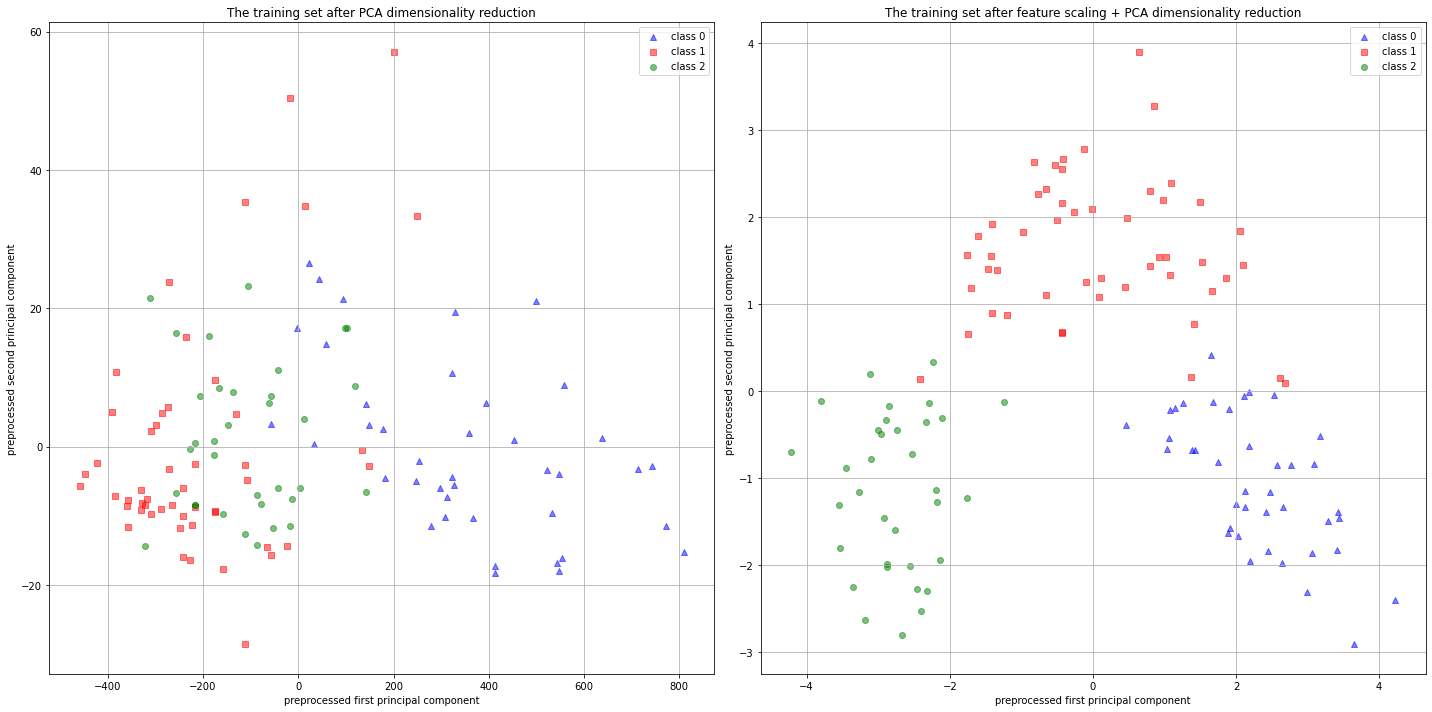

In [30]:
X_train_nostd = pca.transform(X_train)
scaler = std_clf.named_steps['standardscaler']
X_train_std = pca_std.transform(scaler.transform(X_train))

FIG_SIZE = (20, 10)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=FIG_SIZE)


for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax1.scatter(X_train_nostd[y_train == l, 0], X_train_nostd[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )


for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(X_train_std[y_train == l, 0], X_train_std[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax1.set_title(u'The training set after PCA dimensionality reduction')
ax2.set_title(u'The training set after feature scaling + PCA dimensionality reduction')

for ax in (ax1, ax2):
    ax.set_xlabel(u'preprocessed first principal component')
    ax.set_ylabel(u'preprocessed second principal component')
    ax.legend(loc='upper right')
    ax.grid()

plt.tight_layout()